- 라이브러리 호출

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

- 전처리 안된 데이터프레임 불러오기

In [2]:
df_articles = pd.read_csv(r'C:\Users\urina\OneDrive\Desktop\데이터분석 취업 자료\기초 프로젝트\h&m dataset\articles_hm.csv')
df_customers = pd.read_csv(r'C:\Users\urina\OneDrive\Desktop\데이터분석 취업 자료\기초 프로젝트\h&m dataset\customer_hm.csv')
df_transactions = pd.read_csv(r'C:\Users\urina\OneDrive\Desktop\데이터분석 취업 자료\기초 프로젝트\h&m dataset\transactions_hm.csv') 

- 폰트 깨짐 방지

In [3]:
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic') 
else:
    # 리눅스용
    plt.rc('font', family='NanumGothic')

# 마이너스 기호방지
plt.rcParams['axes.unicode_minus'] = False

- 날짜 데이터 변환

In [4]:
df_transactions["t_dat"] = pd.to_datetime(df_transactions["t_dat"])

df_transactions["year"] = df_transactions["t_dat"].dt.year
df_transactions["month"] = df_transactions["t_dat"].dt.month
df_transactions["weekday"] = df_transactions["t_dat"].dt.day_name()

print("---날짜 변환 완료---")
print(df_transactions[['t_dat', 'year', 'month', 'weekday']].head())

---날짜 변환 확인인---
       t_dat  year  month    weekday
0 2019-11-05  2019     11    Tuesday
1 2019-05-22  2019      5  Wednesday
2 2019-05-10  2019      5     Friday
3 2019-08-26  2019      8     Monday
4 2019-08-10  2019      8   Saturday


In [6]:
# 필요한 컬럼만 병합: price, t_dat (from transactions) + product_group_name (from articles)
df_eda = pd.merge(
    df_transactions[['t_dat', 'price', 'article_id']],
    df_articles[['article_id', 'product_group_name']],
    on='article_id',
    how='inner'
)
print("데이터 병합 완료!")

데이터 병합 완료!


- 각 테이블마다 어떤 컬럼이 있고 어떤 PK와 FK를 확인하는 단계

In [9]:
df_articles.head(1)
df_customers.head(1)
df_transactions.head(1)

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,weekday
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,2019,11,Tuesday


In [ ]:
df_customers.head(1)

In [ ]:
df_transactions.head(1)

C:\Users\urina\AppData\Local\Temp\ipykernel_22292\4118866949.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_eda.set_index('t_dat')['price'].resample('M').sum()


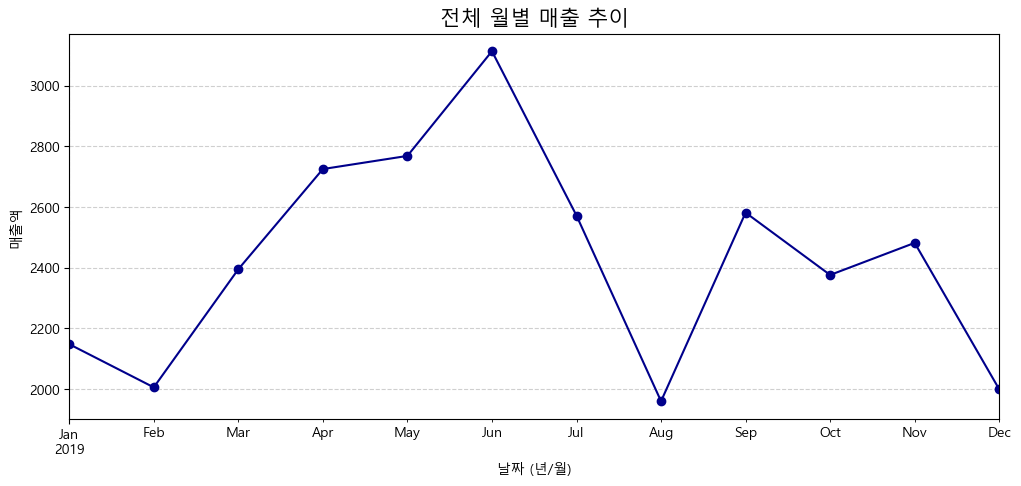

In [7]:
# t_dat을 인덱스로 설정하고 월별로 매출 합계를 계산합니다.
monthly_sales = df_eda.set_index('t_dat')['price'].resample('M').sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='darkblue')

plt.title("전체 월별 매출 추이", fontsize=15)
plt.xlabel("날짜 (년/월)")
plt.ylabel("매출액")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- 1개만 사는 고객과 2개 이상 사는 고객을 각 영수증(같은 날짜, 같은 아이디)별로 나누고 상품의 개수를 집계

1. 나이 구간 지정 [10, 20, 30, 40, 50, 60, 70, 80]




--- 연령대 세그먼트 컬럼 생성 완료! ---


C:\Users\urina\AppData\Local\Temp\ipykernel_22292\3204561676.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='age_group', data=df_customers,


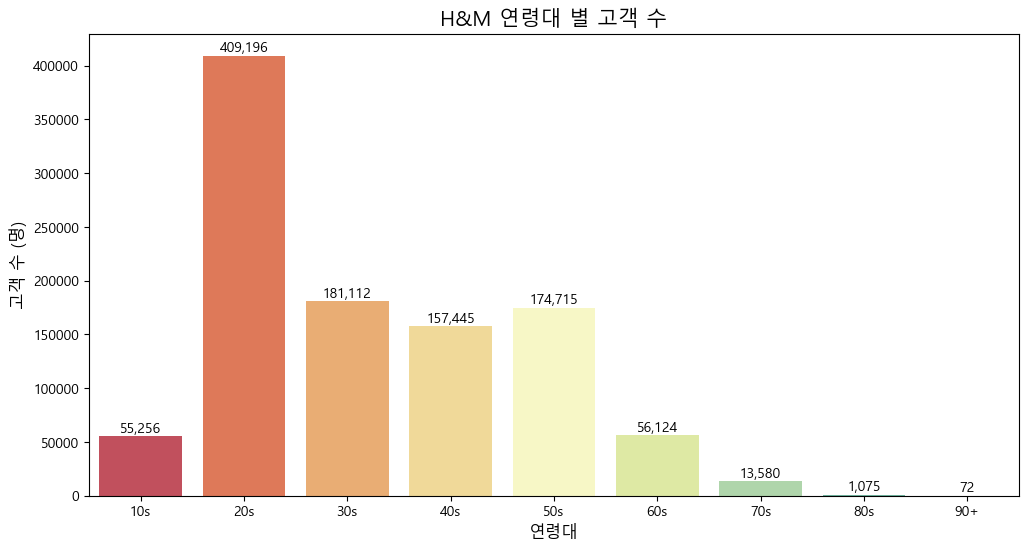

In [8]:

# 1. 10년 단위 구간 설정: (0~19, 20~29, 30~39, ..., 90+)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100] 
labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90+'] 
    
# 2. pd.cut으로 'age_group' 
df_customers['age_group'] = pd.cut(df_customers['age'], bins=bins, labels=labels, right=True)

print("--- 연령대 세그먼트 컬럼 생성 완료! ---")


# 3. 유저 수 시각화
plt.figure(figsize=(12, 6))

# countplot 그리기 (seaborn사용)
ax = sns.countplot(x='age_group', data=df_customers, 
                    palette='Spectral', 
                    order=labels) 

# 그래프 위에 숫자 표시 -> 데이터 라벨링하기
for p in ax.patches:
    height = p.get_height()
    if height > 0:
         ax.text(p.get_x() + p.get_width() / 2., height + 1000, 
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=10)

# plt 시각화 
plt.title('H&M 연령대 별 고객 수', fontsize=15)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('고객 수 (명)', fontsize=12)
plt.show()

- 인기 카테고리 상품 확인

C:\Users\urina\AppData\Local\Temp\ipykernel_22292\2029500800.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='Spectral')


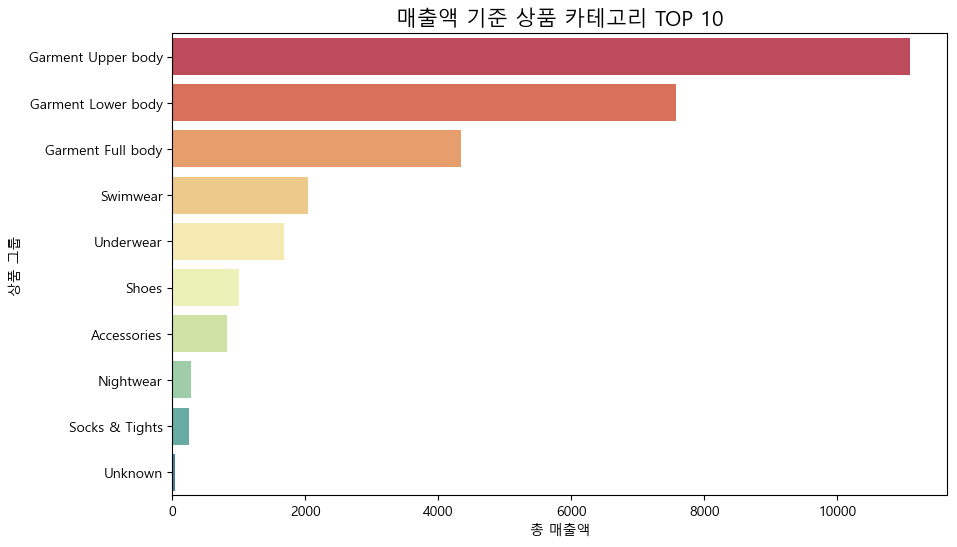

In [10]:
category_sales = df_eda.groupby('product_group_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=category_sales.values, y=category_sales.index, palette='Spectral')

plt.title("매출액 기준 상품 카테고리 TOP 10", fontsize=15)
plt.xlabel("총 매출액")
plt.ylabel("상품 그룹")
plt.show()

- 그렇게 탐색을 하던 도중

 전체 거래의 무려 84%가 '단 1개의 상품'만 구매하고 떠난 경우였습니다. 2개 이상을 구매한 '다품 구매' 고객은 고작 14%에 불과하다는 것을 알게됨

평균 장바구니에 담긴 상품 수: 1.19개
상품을 딱 1개만 구매한 비율: 84.7%


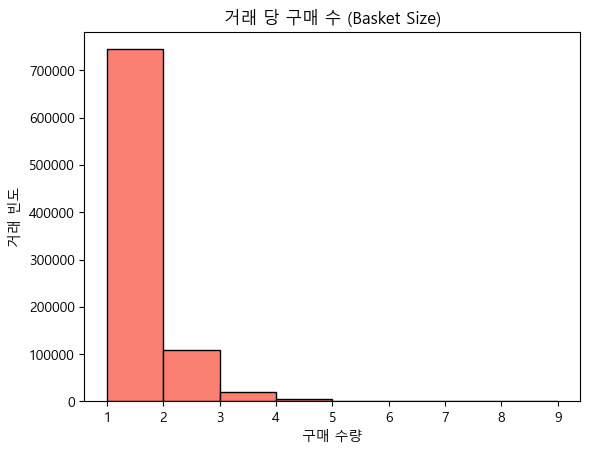

In [20]:
# 1. 영수증(같은 날짜, 같은 고객) 별 구매 상품 개수 세기
basket_size = df_transactions.groupby(['t_dat', 'customer_id'])['article_id'].count()

# 2. 평균 몇 개를 샀을까?
avg_items = basket_size.mean()
print(f"평균 장바구니에 담긴 상품 수: {avg_items:.2f}개")

# 3. 비율 확인: "딱 1개만 산 사람"의 비율은?
one_item_ratio = (basket_size == 1).mean() * 100
print(f"상품을 딱 1개만 구매한 비율: {one_item_ratio:.1f}%")

# 4. 시각화
import matplotlib.pyplot as plt
plt.hist(basket_size, bins=range(1, 10), color='salmon', edgecolor='black')
plt.title('거래 당 구매 수 (Basket Size)')
plt.xlabel("구매 수량")
plt.ylabel("거래 빈도")
plt.show()

- 그래서 우리는 프로젝트의 최종 목표는 "데이터 분석을 통해 84%의 단품 구매자를 16%의 연관? 다품? 구매자(Cross-selling)로 전환시킬 수 있는 구체적인 액션 플랜을 도출하는 것